##Exploratory Data Analysis and Cleaning

available at:

https://dl.dropboxusercontent.com/u/75194/ac297rtut2.ipynb

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

##Pandas


In [70]:
df=pd.read_csv("https://dl.dropboxusercontent.com/u/75194/all.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


Notice we have a table! A spreadsheet! And it indexed the rows. Lets see the types of the columns...

In [3]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [4]:
df.shape

(6000, 10)

In [5]:
df.columns

Index([u'rating', u'review_count', u'isbn', u'booktype', u'author_url', u'year', u'genre_urls', u'dir', u'rating_count', u'name'], dtype='object')

In [6]:
df.rating[df.rating.isnull()]

3643   NaN
5282   NaN
Name: rating, dtype: float64

One can convert to numpy arrays

In [7]:
vals=df.rating[df.rating.notnull()].values
print type(vals)
vals

<type 'numpy.ndarray'>


array([ 4.4 ,  4.41,  3.56, ...,  3.78,  3.91,  4.35])

But one dosent have to

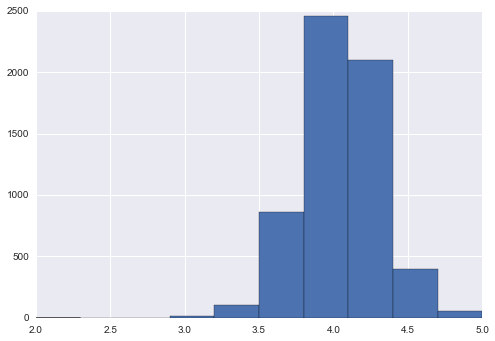

In [9]:
df.rating.hist();

### More cleaning

In [10]:
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


In [11]:
df = df[df.year.notnull()]

In [12]:
df.shape

(5993, 10)

In [13]:
df.rating_count=df.rating_count.astype(int)
df.review_count=df.review_count.astype(int)
df.year=df.year.astype(int)

In [14]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

In [15]:
df[df.genre_urls.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
953,4.56,27,1477276068,good_reads:book,https://www.goodreads.com/author/show/6621980....,2012,NaN,dir10/16243767-crossing-the-seas.html,90,Crossing the Seas
1515,4.56,8,NaN,good_reads:book,https://www.goodreads.com/author/show/394525.T...,2013,NaN,dir16/18136407-crashing-down-to-earth.html,75,Crashing Down to Earth
1693,4.21,7,NaN,good_reads:book,https://www.goodreads.com/author/show/3110785._,2009,NaN,dir17/7425765.html,67,Ð¡Ð»ÑÐ½ÑÐµ Ð½ÐµÐ´Ð¾ÑÐµÐ³Ð°ÐµÐ¼Ð¾
1752,3.85,41,140921818X,good_reads:book,https://www.goodreads.com/author/show/7337562....,13,NaN,dir18/5548850-the-day-jesus-rode-into-croydon....,94,The Day Jesus Rode Into Croydon
1942,4.66,8,0992382009,good_reads:book,https://www.goodreads.com/author/show/7574275....,2014,NaN,dir20/19532388-letters-from-your-soul.html,29,Letters from your soul
2034,4.92,2,147930414X,good_reads:book,https://www.goodreads.com/author/show/6467808....,2012,NaN,dir21/20363899-happy-halloween.html,49,Happy Halloween
2067,4.16,24,0804844399,good_reads:book,https://www.goodreads.com/author/show/6894841....,2012,NaN,dir21/18343754-a-capitalist-in-north-korea.html,57,A Capitalist in North Korea
2145,5.00,3,1300589469,good_reads:book,https://www.goodreads.com/author/show/6906561....,2012,NaN,dir22/17287259-a-book-about-absolutely-nothing...,63,A Book About Absolutely Nothing.
2170,4.65,12,NaN,good_reads:book,https://www.goodreads.com/author/show/6565853....,2012,NaN,dir22/17904495-curse-of-the-salute.html,31,Curse of The Salute
2190,4.33,31,0987434853,good_reads:book,https://www.goodreads.com/author/show/4443219....,2013,NaN,dir22/18251020-life-song.html,40,Life Song


In [16]:
df.genre_urls[df.genre_urls.isnull()]=""
df.isbn[df.isbn.isnull()]=""

In [17]:
df[df.genre_urls.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name


In [18]:
df[df.author_url.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name


In [19]:
df[df.booktype.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name


In [20]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

In [21]:
df['author']=df.author_url.map(lambda x: ".".join(x.split('/')[-1].split('.')[1:]))
df['booktype']=df.booktype.map(lambda x: x.split(':')[-1])

In [22]:
def saj(item):
    genres=item.split('|')
    genres=[e.split('/')[-1] for e in genres]
    return "|".join(genres)

df['genres']=df.genre_urls.map(saj)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


In [23]:
df[df.author=="Robin_Hobb"]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
667,4.10,2980,0006480098,book,https://www.goodreads.com/author/show/25307.Ro...,1995,/genres/fantasy|/genres/fiction|/genres/fantas...,dir07/45107.Assassin_s_Apprentice.html,87652,"Assassin's Apprentice (Farseer Trilogy, #1)",Robin_Hobb,fantasy|fiction|fantasy|epic-fantasy|fantasy|h...
1232,4.18,1228,0006480101,book,https://www.goodreads.com/author/show/25307.Ro...,1996,/genres/fantasy|/genres/fiction|/genres/fantas...,dir13/68487.Royal_Assassin.html,59860,"Royal Assassin (Farseer Trilogy, #2)",Robin_Hobb,fantasy|fiction|fantasy|epic-fantasy|fantasy|h...
1619,4.32,578,0553582461,book,https://www.goodreads.com/author/show/25307.Ro...,2003,/genres/fantasy|/genres/fiction|/genres/fantas...,dir17/45108.Fool_s_Fate.html,28379,"Fool's Fate (Tawny Man, #3)",Robin_Hobb,fantasy|fiction|fantasy|epic-fantasy|science-f...
1647,4.07,769,000649885X,book,https://www.goodreads.com/author/show/25307.Ro...,1998,/genres/fantasy|/genres/fiction|/genres/fantas...,dir17/45100.Ship_of_Magic.html,24477,"Ship of Magic (Liveship Traders, #1)",Robin_Hobb,fantasy|fiction|fantasy|epic-fantasy|fantasy|d...
1760,4.16,454,0553575651,book,https://www.goodreads.com/author/show/25307.Ro...,2000,/genres/fantasy|/genres/fiction|/genres/fantas...,dir18/45102.Ship_of_Destiny.html,19916,"Ship of Destiny (Liveship Traders, #3)",Robin_Hobb,fantasy|fiction|fantasy|epic-fantasy|fantasy|d...
2033,4.15,371,0006498868,book,https://www.goodreads.com/author/show/25307.Ro...,1999,/genres/fantasy|/genres/fiction|/genres/fantas...,dir21/45101.The_Mad_Ship.html,19829,"The Mad Ship (Liveship Traders, #2)",Robin_Hobb,fantasy|fiction|fantasy|epic-fantasy|fantasy|d...
2148,4.23,585,0006486010,book,https://www.goodreads.com/author/show/25307.Ro...,2001,/genres/fantasy|/genres/fiction|/genres/fantas...,dir22/68488.Fool_s_Errand.html,31573,"Fool's Errand (Tawny Man, #1)",Robin_Hobb,fantasy|fiction|fantasy|epic-fantasy|science-f...
2483,4.27,349,0553582453,book,https://www.goodreads.com/author/show/25307.Ro...,2002,/genres/fantasy|/genres/fiction|/genres/fantas...,dir25/45109.Golden_Fool.html,28463,"Golden Fool (Tawny Man, #2)",Robin_Hobb,fantasy|fiction|fantasy|epic-fantasy|science-f...


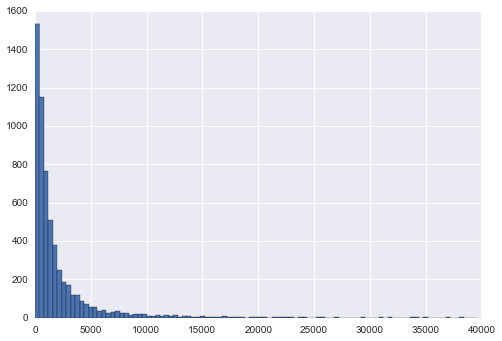

In [24]:
df.review_count.hist(bins=np.arange(0, 40000, 400));

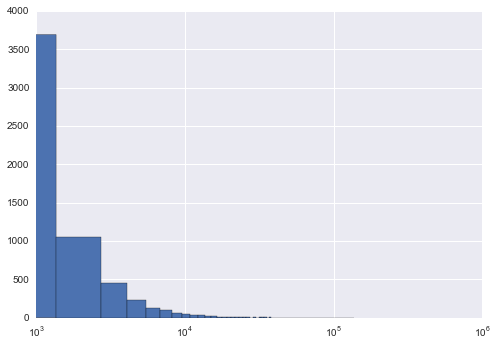

In [25]:
df.review_count.hist(bins=100)
plt.xscale("log");

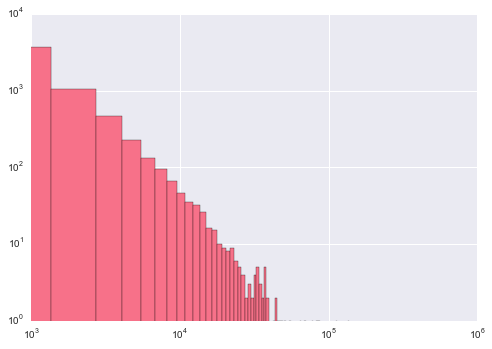

In [26]:
sns.set_palette("husl")
df.review_count.hist(bins=100, log=True)
plt.xscale("log");

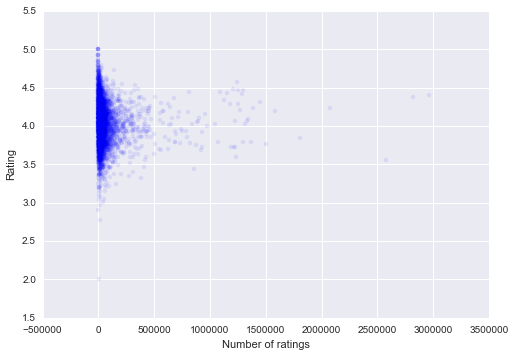

In [29]:
plt.scatter(df.rating_count, df.rating, lw=0, alpha=.08)
plt.xlabel("Number of ratings")
plt.ylabel("Rating")

In [30]:
decade =  (df.year // 10) * 10
print type(decade)
decade

<class 'pandas.core.series.Series'>


0     2000
1     2000
2     2000
3     1960
4     1810
5     1930
6     1940
7     1960
8     1940
9     1970
10    1990
11    2000
12    2000
13    1860
14    1590
...
5985    2000
5986    2010
5987    1940
5988    1970
5989    2010
5990    1980
5991    2000
5992    2000
5993    2010
5994    2000
5995    2000
5996    2000
5997    2010
5998    2000
5999    2000
Name: year, Length: 5993, dtype: int64

In [31]:
bydecade_df = df[['name', 'year']]
bydecade_df['decade'] = decade

bydecade_df.head()

,name,year,decade
0,"The Hunger Games (The Hunger Games, #1)",2008,2000
1,Harry Potter and the Order of the Phoenix (Har...,2003,2000
2,"Twilight (Twilight, #1)",2005,2000
3,To Kill a Mockingbird,1960,1960
4,Pride and Prejudice,1813,1810


In [32]:
dfdecade=df.groupby(decade)
print type(dfdecade)
dfdecade.groups

<class 'pandas.core.groupby.DataFrameGroupBy'>


{-1500: [1398],
 -800: [47, 246],
 -560: [1397],
 -520: [674],
 -500: [746],
 -460: [1815],
 -450: [777],
 -440: [1428, 2527],
 -430: [629],
 -420: [2078, 3757],
 -400: [1233, 1882, 3133],
 -390: [4475],
 -380: [455],
 -370: [4402],
 -360: [5367],
 -350: [3274],
 -30: [596],
 0: [1330, 4717],
 10: [1752],
 100: [2329],
 120: [4843],
 130: [1860],
 150: [4534],
 170: [1169],
 200: [1622, 5404],
 210: [2564],
 390: [1393],
 630: [301],
 800: [327],
 900: [569],
 960: [4953],
 1000: [852, 2567],
 1010: [5439],
 1100: [1653, 5798],
 1140: [5831],
 1200: [4691],
 1210: [3311],
 1220: [4054],
 1300: [2863],
 1310: [363],
 1320: [132, 5354],
 1340: [913],
 1380: [1878, 4422],
 1390: [167, 3272, 5542],
 1480: [1613],
 1510: [1692],
 1520: [2266, 3894],
 1530: [384, 3753],
 1570: [2177, 4637],
 1580: [5705],
 1590: [14, 161, 495, 539, 774, 1144, 1204, 3954],
 1600: [82, 245, 248, 489, 531, 797, 2384, 2454, 2687, 3097, 5345, 5361],
 1610: [918, 4617],
 1620: [283, 5598],
 1630: [3200],
 1640: [4

In [33]:
decade_ratings = df.groupby(decade).rating
decade_mean=decade_ratings.mean()
decade_mean.name = 'Decade Mean'
print decade_mean

year
-1500    3.600000
-800     3.845000
-560     4.030000
-520     3.920000
-500     4.060000
-460     3.960000
-450     3.520000
-440     3.870000
-430     3.640000
-420     3.830000
-400     4.086667
-390     4.110000
-380     3.850000
-370     3.990000
-360     4.070000
...
1870    4.014400
1880    3.956053
1890    3.935946
1900    4.005246
1910    3.962549
1920    4.008222
1930    4.059375
1940    4.061360
1950    4.047135
1960    4.075707
1970    4.044161
1980    4.031509
1990    4.021173
2000    4.003405
2010    4.128055
Name: Decade Mean, Length: 90, dtype: float64


In [34]:
decade_std=decade_ratings.std()

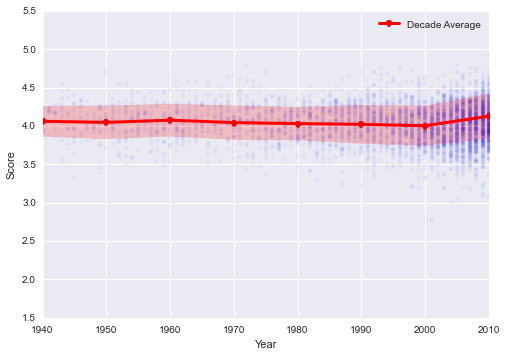

In [35]:
plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.scatter(df.year, df.rating, alpha=.04, lw=0)
plt.fill_between(decade_mean.index, (decade_mean + decade_std).values,
                 (decade_mean - decade_std).values, color='r', alpha=.2)
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
plt.xlim([1940, 2010]);

In [36]:
df.genres

0     young-adult|science-fiction|dystopia|fantasy|s...
1     fantasy|young-adult|fiction|fantasy|magic|chil...
2     young-adult|fantasy|romance|paranormal|vampire...
3     classics|fiction|historical-fiction|academic|s...
4     classics|fiction|romance|historical-fiction|li...
5     classics|historical-fiction|fiction|romance|li...
6     classics|young-adult|childrens|christian|adven...
7     childrens|young-adult|childrens|picture-books|...
8     classics|fiction|science-fiction|dystopia|lite...
9     science-fiction|humor|fantasy|classics|humor|c...
10    fiction|historical-fiction|romance|cultural|ja...
11    mystery|thriller|suspense|historical-fiction|a...
12    historical-fiction|young-adult|fiction|book-cl...
13    classics|childrens|young-adult|literature|adve...
14    classics|plays|fiction|romance|academic|school...
...
5985    fiction|young-adult|book-club|young-adult|youn...
5986    young-adult|fantasy|paranormal|shapeshifters|w...
5987    economics|non-fiction|politics|b

In [43]:
genres = set()
for m in df.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

for genre in genres:
    df["genre:"+genre] = [genre in g.split('|') for g in df.genres]
         
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres,genre:,genre:14th-century,genre:15th-century,genre:16th-century,genre:17th-century,genre:18th-century,genre:19th-century,genre:20th-century,genre:abuse,genre:academia,genre:academic,genre:action,genre:activism,genre:adolescence,genre:adoption,genre:adult,genre:adult-fiction,genre:adventure,genre:africa,genre:african-american,genre:african-american-literature,genre:african-literature,genre:aliens,genre:alternate-history,genre:american,genre:american-civil-war,genre:american-fiction,genre:american-history,genre:american-novels,genre:americana,genre:anarchism,genre:ancient,genre:angels,genre:animal-fiction,genre:animals,genre:anime,genre:anthologies,genre:anthropology,...,genre:time-travel-romance,genre:tragedy,genre:trans,genre:transgender,genre:travel,genre:travelogue,genre:true-crime,genre:true-story,genre:turkish,genre:turkish-literature,genre:ukraine,genre:unicorns,genre:united-states,genre:urban-fantasy,genre:urban-planning,genre:urbanism,genre:us-presidents,genre:utopia,genre:vampires,genre:vegan,genre:video-games,genre:walking,genre:war,genre:weird-fiction,genre:werewolves,genre:western,genre:western-romance,genre:wicca,genre:wilderness,genre:wildlife,genre:witches,genre:wizards,genre:wolves,genre:womens,genre:womens-fiction,genre:womens-studies,genre:world-history,genre:world-war-ii,genre:writing,genre:x-men,genre:young-adult,genre:young-adult-contemporary,genre:young-adult-fantasy,genre:young-adult-historical-fiction,genre:young-adult-paranormal,genre:young-adult-romance,genre:young-adult-science-fiction,genre:young-readers,genre:zen,genre:zombies
0,4.40,136455,0439023483,book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,4.41,16648,0439358078,book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,3.56,85746,0316015849,book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,F

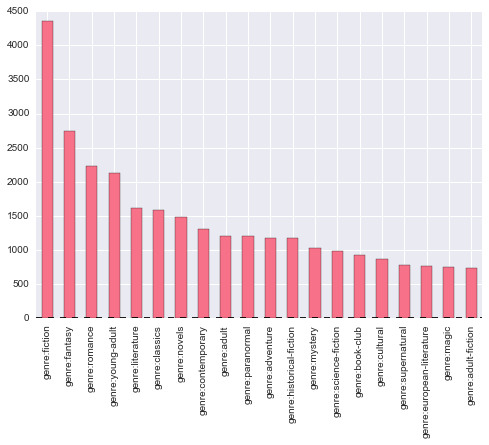

In [51]:
genreslist = ['genre:'+g for g in genres]
dfg=df[genreslist].sum()
dfg.sort(ascending=False)
dfg.ix[0:20].plot(kind="bar")

In [60]:
genres_wanted=dfg.index[dfg.values> 550]
genres_wanted

Index([u'genre:fiction', u'genre:fantasy', u'genre:romance', u'genre:young-adult', u'genre:literature', u'genre:classics', u'genre:novels', u'genre:contemporary', u'genre:adult', u'genre:paranormal', u'genre:adventure', u'genre:historical-fiction', u'genre:mystery', u'genre:science-fiction', u'genre:book-club', u'genre:cultural', u'genre:supernatural', u'genre:european-literature', u'genre:magic', u'genre:adult-fiction', u'genre:science-fiction-fantasy', u'genre:childrens', u'genre:urban-fantasy', u'genre:teen', u'genre:paranormal-romance', u'genre:thriller', u'genre:non-fiction', u'genre:humor', u'genre:womens-fiction', u'genre:chick-lit'], dtype='object')

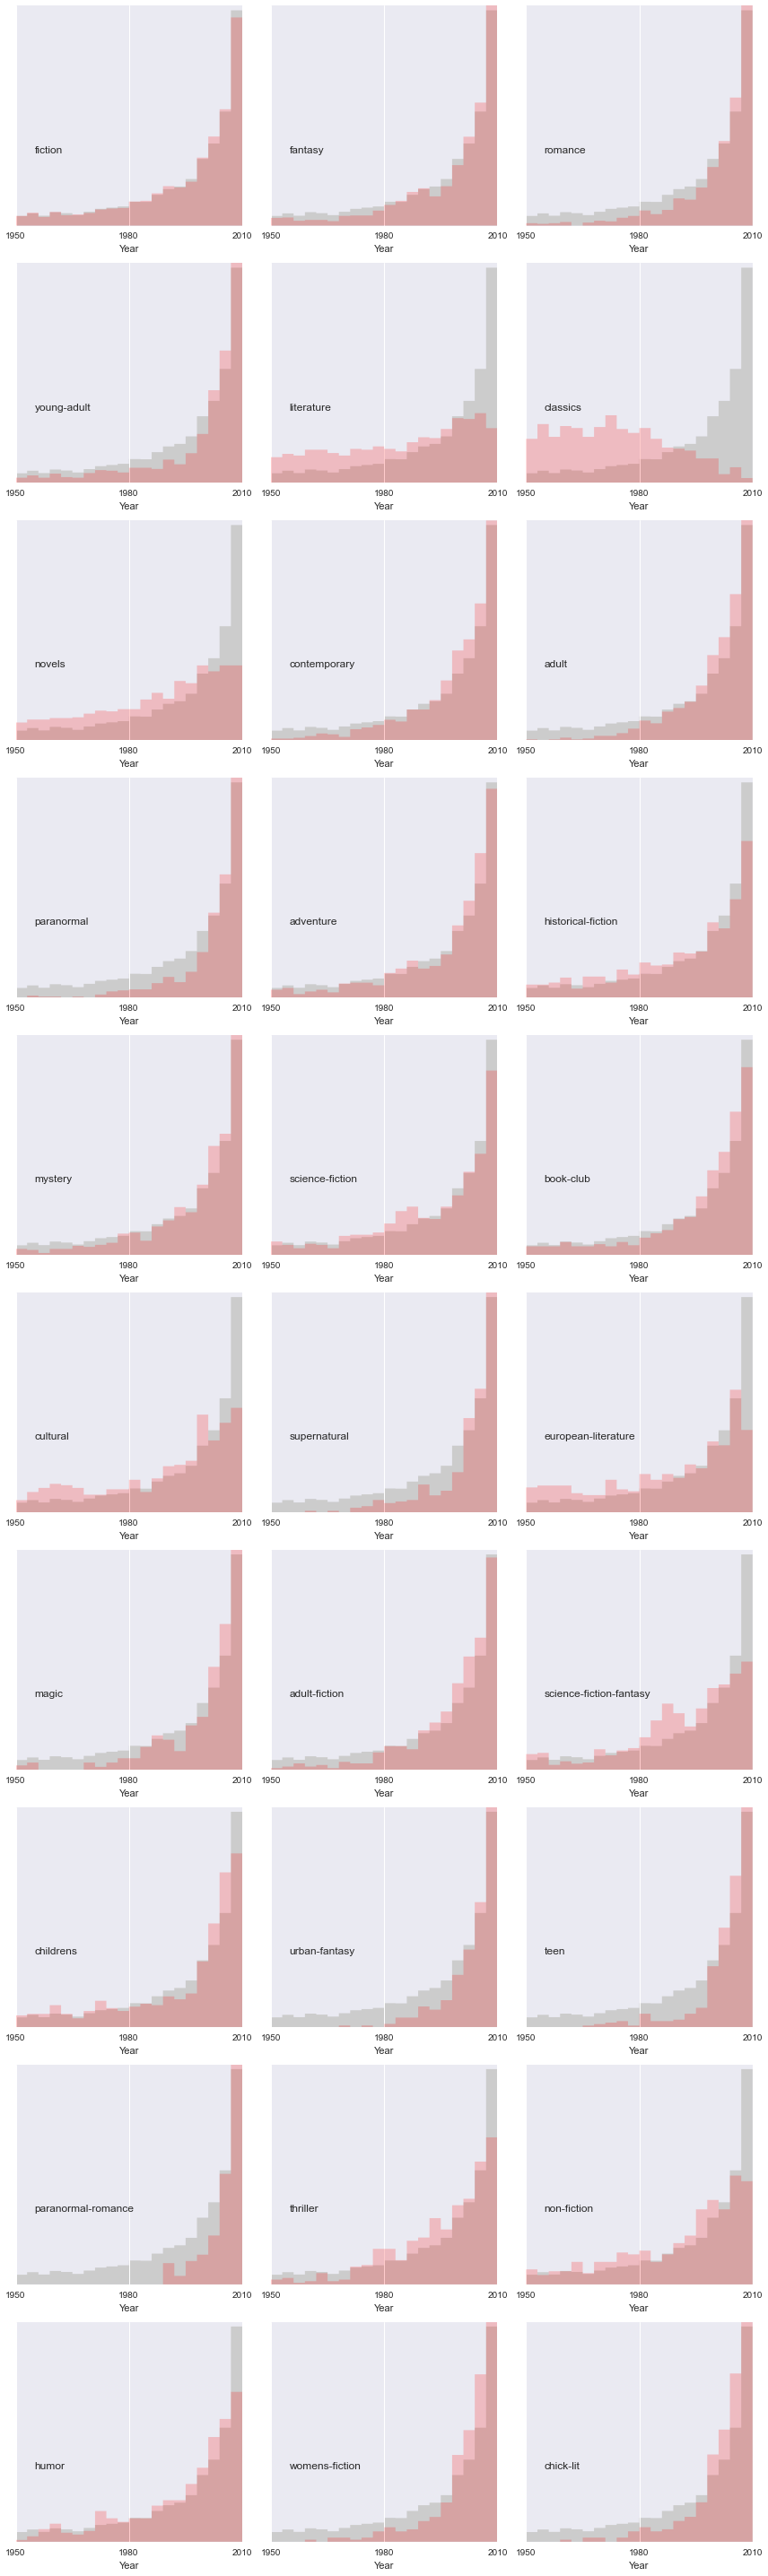

In [64]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 40), 
                         tight_layout=True)
#print axes.ravel()
bins = np.arange(1950, 2013, 3)
for ax, genre in zip(axes.ravel(), genres_wanted):
    #print genre, df[df[genre] == True].year.values
    ax.hist(df[df[genre] == True].year.values, 
            bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.2, ec='none')
    ax.hist(df.year, bins=bins, histtype='stepfilled', ec='None', normed=True, zorder=0, color='#cccccc')
    
    ax.annotate(genre.split(':')[-1], xy=(1955, 3e-2), fontsize=12)
    ax.xaxis.set_ticks(np.arange(1950, 2013, 30))
    ax.set_yticks([])
    ax.set_xlabel('Year')

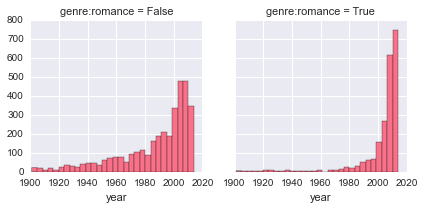

In [68]:
dfrecent=df[df.year > 1900]
g = sns.FacetGrid(dfrecent, col="genre:romance")
g.map(plt.hist, "year", bins=30);

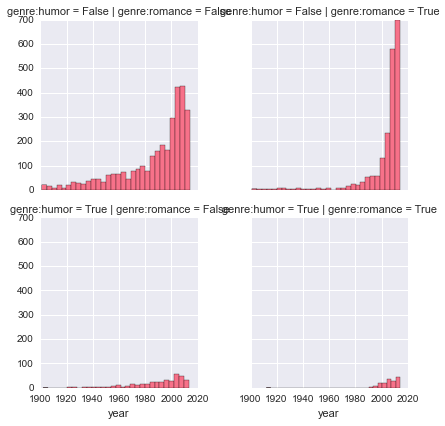

In [69]:
dfrecent=df[df.year > 1900]
g = sns.FacetGrid(dfrecent, col="genre:romance", row='genre:humor')
g.map(plt.hist, "year", bins=30);